In [1]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
img = cv2.imread('data/benign/577_2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 2)
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 2)

edged = cv2.Canny(dilation, 30, 200)

_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(cnt) for cnt in contours]
rects = sorted(rects,key=lambda  x:x[1],reverse=True)
i = -1
j = 1
y_old = 315
x_old = 560
for rect in rects:
    x,y,w,h = rect
    area = w * h
if area > 200 and area < 560:

    if (y_old - y) > 200:
        i += 1
        y_old = y

    if abs(x_old - x) > 300:
        x_old = x
        x,y,w,h = rect

out = img[y+10:y+h-5,x+10:x+w-5]

C:\Users\sarak\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


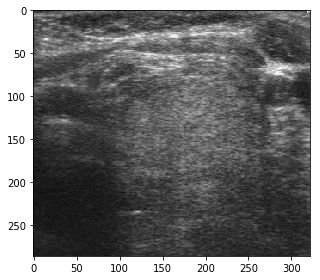

In [13]:
io.imshow(out)

C:\Users\sarak\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


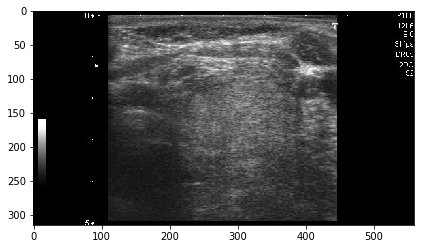

In [14]:
io.imshow(img)

In [ ]:






            out = img[y+10:y+h-10,x+10:x+w-10]
            cv2.imwrite('cropped\\' + fileName[i] + '_' + str(j) + '.jpg', out)

            j+=1